# BA222 Problem Set 2
Ethan Chang

In [1]:
import pathlib
import numpy as np
import numpy.typing as npt
from typing import Any
import pandas as pd
import matplotlib.pyplot as plt

--- 

## Part 1: Python Basics

### Question 1: Compound Interest Calculator

In [2]:
# Question 1.a

def compound(K: float, r: float, T: float) -> float:
    """ Returns the dollar value of money (including the principal `K`), 
        that will be had at the end of `T` years using rate `r`"""
    return round(K * (1 + r) ** T, 2)

assert(compound(1000, 0.05, 10) == 1628.89)
assert(compound(100, 0.04, 20) == 219.11)

In [3]:
# Question 1.b

if compound(5000, 0.06, 10) > compound(2500, 0.06, 25):
    print("$5,000 compounding for 10 years at a 6% interest rate is better")
else:
    print("$2,500 compounding for 25 years at a 6% interest rate is better")

$2,500 compounding for 25 years at a 6% interest rate is better


### Question 2: Checking First and Last

In [4]:
def first_last_same(arr: list) -> bool:
    """ Returns True if the first and last elements of `arr` are the same """
    return arr[0] == arr[-1]

assert(first_last_same([1, 0, 1]) == True)
assert(first_last_same([10, 9, 8, 7, 6]) == False)

--- 
## Part 2: Numpy and Pandas

### Question 3: Numpy Simulation and Drop-Shipping Business

In [5]:
# Question 3.b-d
obs_price: np.ndarray = np.random.normal(20, 2, 1000)
obs_quant: np.ndarray = np.random.randint(100, 201, 1000)
obs_unit_cost: np.ndarray = np.random.normal(3, 0.5, 1000)

In [6]:
def profit(price: Any, quantity: Any, unit_cost: Any, fixed_cost=500, shipping=5) -> float | npt.ArrayLike:
    """ Returns the profit given the price, quantity, and unit cost """
    return price * quantity - (unit_cost + shipping) * quantity - fixed_cost

In [7]:
# Question 3.e and f

profits = profit(obs_price, obs_quant, obs_unit_cost)

pd.DataFrame({'profits': profits}).describe()

,profits
count,1000.000000
mean,1331.593434
std,454.407492
min,268.080703
25%,994.621923
50%,1292.269149
75%,1674.082612
max,3084.858160


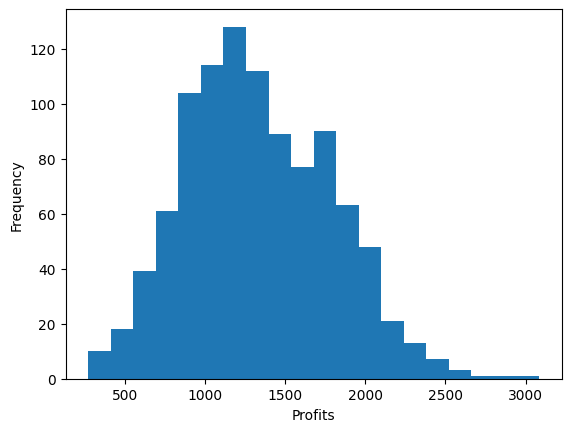

In [8]:
# Question 3.g

plt.hist(profits, bins=20)
plt.xlabel('Profits')
plt.ylabel('Frequency')
plt.show()

The distribution is roughly normal, with a possible minor skew to the right due to the fixed costs.

### Question 4: Real Data Analysis in Pandas

In [9]:
# Question 4.a

# just in case you run the notebooks
path = f'{pathlib.Path.cwd().parents[1]}/CSVs/CongressTerms.csv' if 'ethan' in pathlib.Path.cwd().parts else 'CongressTerms.csv'

congress = pd.read_csv(path)
congress.head()

,congress,chamber,firstname,lastname,birthday,state,party,Incumbent(Dummy),termstart,age
0,107,house,Benjamin,Gilman,12/6/1922,NY,R,1,1/3/2001,78.1
1,107,house,Ralph,Hall,5/3/1923,TX,D,1,1/3/2001,77.7
2,107,house,Henry,Hyde,4/18/1924,IL,R,1,1/3/2001,76.7
3,107,house,Ralph,Regula,12/3/1924,OH,R,1,1/3/2001,76.1
4,107,house,Carrie,Meek,4/29/1926,FL,D,1,1/3/2001,74.7


In [10]:
# Question 4.b

num_obs = len(congress)
print(f'There are {num_obs} observations in the dataset')

num_house = len(congress[congress['chamber'] == 'house'])
print(f'There are {num_house} House observations and {num_obs - num_house} Senate observations')

There are 3822 observations in the dataset
There are 3098 House observations and 724 Senate observations


In [11]:
# Question 4.c

# mean age of senators in the 107th session of congress
congress[(congress['congress'] == 107) & (congress['chamber'] == 'senate')]['age'].mean()

58.89903846153846

In [12]:
# from congress['ages'] grab the index of max val, then loc to grab the row
congress.loc[congress['age'].idxmax()]

congress                  107
chamber                senate
firstname                  J.
lastname             Thurmond
birthday            12/5/1902
state                      SC
party                       R
Incumbent(Dummy)            1
termstart            1/3/2001
age                      98.1
Name: 442, dtype: object

Question 4.d

The value seems reasonable as James Strom Thurmond Sr. lived until he was 100.

In [13]:
# Question 4.e

congress.query("(chamber == 'house') & (congress == 110)")['firstname'].value_counts().head(1)

firstname
John    30
Name: count, dtype: int64